# "E is for Exploratory Data Analysis: Images"
> What is Exploratory Data Analysis (EDA), why is it done, and how do we do it in Python?

- toc: false 
- badges: True
- comments: true
- categories: []
- hide: True
- image: images/images/e-is-for-eda-images/pexels-ready-made-3847646.jpg

While my previous posts outlined some methods for conducting [EDA for numeric data](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/e/2020/06/15/e-is-for-eda.html) as well as [categorical data](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/e/2020/07/06/e-is-for-eda.html), this post focuses on EDA for images. 

## _What is **Exploratory Data Analysis (EDA)**?_
Again, since [all learning is repetition](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=224340), EDA is a process by which we 'get to know' our data by conducting basic descriptive statistics and visualizations.

## _Why is it done for images?_
We need to know:
- how many images we have
- if we're doing supervised learning, if they labeled appropriately
- if they are the right format (i.e. size and color


## _How do we do it in Python?_
As always, I'll follow the steps outlined in [_Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow_](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md)

### Step 1: Frame the Problem
"Is it possible to determine the minimum age a reader should be for a given book based solely on the cover?"

### Step 2: Get the Data
As mentioned in my previous [posts](https://educatorsrlearners.github.io/an-a-z-of-machine-learning/e/2020/06/15/e-is-for-eda.html), I sourced labeled training data from [Common Sense Media's Book Reviews](https://www.commonsensemedia.org/book-reviews) by scraping and [saving](https://github.com/educatorsRlearners/book-maturity/blob/master/00_get_search_pages.ipynb) the target pages using `BeautifulSoup` 

![](../images/e-is-for-eda/csm2.png "Credit: https://www.commonsensemedia.org/book-reviews")  

and then extracted and [saved](https://github.com/educatorsRlearners/book-maturity/blob/master/15_get_covers.ipynb) the book covers into a separate folder.

In the end, I was able to use over 5000 covers for training and testing purposes, but today we'll only work with a sample of the covers which can be downloaded from [here](https://github.com/educatorsRlearners/an-a-z-of-machine-learning/tree/master/data/covers). 

### Step 3: Explore the Data to Gain Insights (i.e. EDA)
As always, import the essential libraries, then load the data. 

In [1]:
#hide
import warnings; warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import os

import cv2
from PIL import Image

In [3]:
#hide
IMAGES_PATH = "/home/evan/Project/an-a-z-of-machine-learning/data/covers/"

#### How large is our sample?

In [4]:
image_files = list(os.listdir(IMAGES_PATH))
print("Number of image files: {}".format(len(image_files)))

Number of image files: 561


#### What does our target look like? 

To answer that question, we can create a data frame of the book titles and the target ages in our sample, and then plot the target. 

Since I scraped the data, I know the beginning of the file name is the target age, (i.e., 13 is the minimum age for the file '13_dance-of-thieves-book-1.jpg'.)

The image size is: (170, 255)


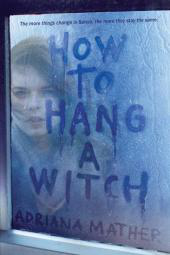

In [5]:

random_file = np.random.choice(image_files)
sample = Image.open(IMAGES_PATH+random_file) 
print("The image size is: {}".format(sample.size))
sample

In [6]:
df = pd.DataFrame(data=image_files, columns=['files'])

In [7]:
df.head()

,files
0,13_dance-of-thieves-book-1.jpg
1,11_ways-to-live-forever.jpg
2,13_this-time-will-be-different.jpg
3,10_the-care-and-keeping-of-you-2-the-body-book...
4,8_moonpenny-island.jpg


In [8]:
df['age'] = df['files'].str.split("_").str[0]

In [9]:
df.head()

,files,age
0,13_dance-of-thieves-book-1.jpg,13
1,11_ways-to-live-forever.jpg,11
2,13_this-time-will-be-different.jpg,13
3,10_the-care-and-keeping-of-you-2-the-body-book...,10
4,8_moonpenny-island.jpg,8


In [10]:
width = []
height = []
channels = []
for image in image_files: 
    img = cv2.imread(IMAGES_PATH+image)
    img = img.shape
    height.append(img[0])
    width.append(img[1])
    channels.append(img[2])

In [13]:
df['width'] = width
df['height'] = height
df['channels'] = channels

In [14]:
df.head()

,files,age,width,height,channels
0,13_dance-of-thieves-book-1.jpg,13,170,255,3
1,11_ways-to-live-forever.jpg,11,170,255,3
2,13_this-time-will-be-different.jpg,13,170,255,3
3,10_the-care-and-keeping-of-you-2-the-body-book...,10,170,255,3
4,8_moonpenny-island.jpg,8,170,255,3


## Summary

 - :ballot_box_with_check: numeric data 
 - :ballot_box_with_check: categorical data
 - :black_square_button: images (book covers)

Two down; one to go! 

Going forward, my key points to remember are: 

### What type of categorical data do I have?
There is a huge difference between ordered (i.e. "bad", "good", "great") and truly nominal data that has no order/ranking like different genres; just because ***I*** prefer science fiction to fantasy, it doesn't mean it actually ***is*** superior. 

### Are missing values really missing? 
Several of the features had missing values which were, in fact, not truly missing; for example, the `award` and `awards` features were mostly blank for a very good reason: the book didn't win one of the four awards recognized by Common Sense Media. 

In conclusion, both of the points above can be summarized simply by as "be sure to get to know your data."    

Happy coding!

#### Footnotes
{{ 'Adapted from [_Engineering Statistics Handbook_](https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm)' | fndetail: 1 }}    
{{ 'Be sure to check out this excellent [post](https://beta.deepnote.com/article/sidetable-pandas-methods-you-didnt-know-you-needed) by Jeff Hale for more examples on how to use this package' | fndetail: 2 }}  
{{ 'See this post on [Smarter Ways to Encode Categorical Data](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159)' | fndetail: 3 }}    
{{ 'Big *Thank You* to [Chaim Gluck](https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd) for providing this tip' | fndetail: 4 }}